In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib as plt
import ipynb.fs.full.visuals as vs
%matplotlib inline

in_file = '/Users/patrickcullinane/PycharmProjects/titanic_2/machine-learning/projects/titanic_survival_exploration/titanic_data.csv'
full_data = pd.read_csv(in_file)

outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

display(data.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return 'Predictions have an accuracy of {:.2f}%'.format\
            ((truth == pred).mean()*100)

    else:
        return 'Number of predictions does not match number of\
               outcomes!'

predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%


Question 1:

In [4]:
def predictions_0(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_0(data)

print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%


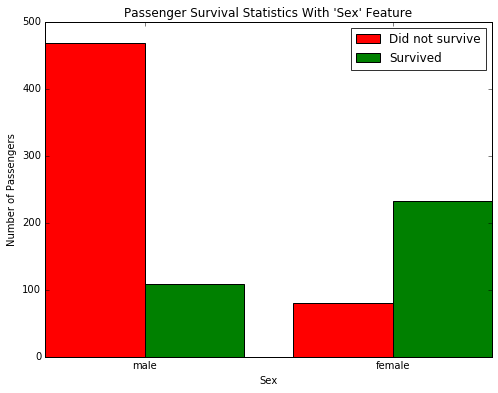

In [5]:
vs.survival_stats(data, outcomes, 'Sex')

Question 2:

In [6]:
gender = data['Sex']

def predictions_1(data):
    predictions = []  
    for i in range(len(gender)):
        if gender.iloc[i] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

accuracy_score(outcomes, predictions_1(data))

'Predictions have an accuracy of 78.68%'

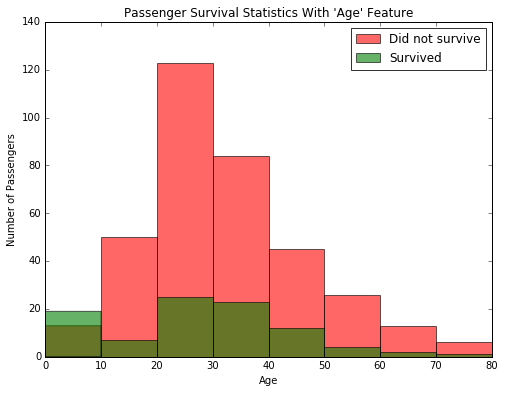

In [7]:
vs.survival_stats(data, outcomes, 'Age', ['Sex == "male"'])

Question 3:

In [8]:
age = data['Age']

def predictions_2(data):
    predictions = []  
    for i in range(len(gender)):
        if gender.iloc[i] == 'female':
            predictions.append(1)
        elif gender.iloc[i] == 'male' and age.iloc[i] <= 10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

accuracy_score(outcomes, predictions_2(data))


'Predictions have an accuracy of 79.24%'

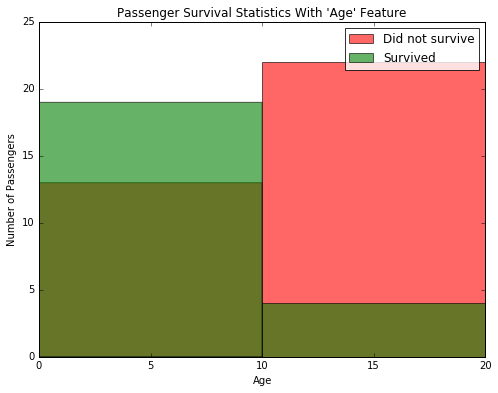

In [9]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

Question 4:

In [96]:
SibSp = data['SibSp']
fare = data['Fare']
embarked = data['Embarked']
Pclass = data['Pclass']
Parch = data['Parch']


def predictions_3(data):
    predictions = []  
    for i in range(len(gender)):
        if gender.iloc[i] == 'female':
            predictions.append(1)
        elif gender.iloc[i] == 'male' and age.iloc[i] <= 10 and Pclass.iloc[i] <= 2:
            predictions.append(1)
        elif gender.iloc[i] == 'male' and Pclass.iloc[i] == 1 and Parch.iloc[i] == 0 and fare.iloc[i] > 400:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

accuracy_score(outcomes, predictions_3(data))

'Predictions have an accuracy of 80.02%'

To get the prediction over 80% I first took at look at female attributes to see if I could squeeze out any more percentage points. I tried to isolate females in pclass 3 and saw that for ages over 20 in this category showed little survival potential. However I couldn't get over 80% so I switched to checking out ways of finding more males that survied. I was able to find out that males under the age of ten showed greater survival potential. Further isolating individuals I ran through several attributes until I saw that males with Pclass of 2 or less showed better survivability. During this time I saw that males with fares greater than 400, pclass of 1, and parch of 0 correlated with a higher survival rate. 

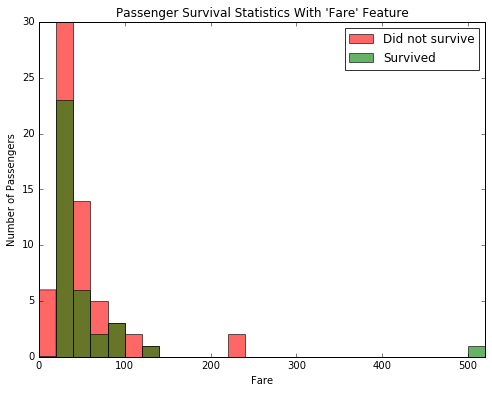

In [97]:
vs.survival_stats(data, outcomes, "Fare", ["Sex == 'male'", "Pclass == 1", "Parch == 0"])

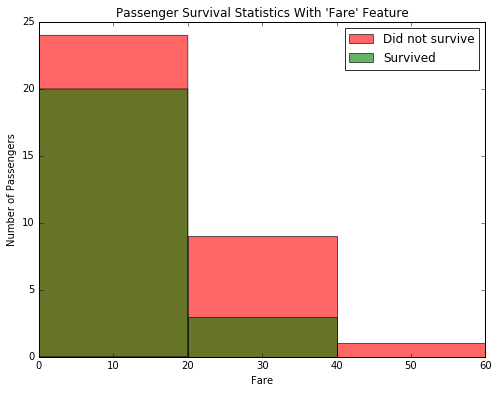

In [100]:
vs.survival_stats(data, outcomes, "Fare", ["Sex == 'female'", "Pclass == 3", "Age >= 20"])

Question 5:

A real world scenario where supervised learning could be predicting heart rate variability (HRV) post exercise. HRV is often used as a predictor of training recovery in sports training. Greater HRV usually means that the athlete is fully recovered. Some factors that might come into play are type of workout, duration of workout, exercises, percentage of 1 rep max used during workout, sleep duration, resting heart rate, stress level (self-reported), among other variables. I believe that sleep duration would have a great effect on HRV as more sleep is usually correlated with recovery. Also % of 1 rep max used during training would be a great predictor of recovery ability. The heavier the weights (>% of 1RM), the more likely that HRV would decrease. 